# 11 - The Normal Distribution

**The Normal Distribution:** The famous bell curve. Most values cluster around the average, with fewer values at the extremes.

**Key Properties:**
- Symmetric around the mean
- Defined by two parameters: mean (center) and standard deviation (spread)
- **68-95-99.7 Rule:** 
  - 68% of data within 1 standard deviation
  - 95% within 2 standard deviations
  - 99.7% within 3 standard deviations

**Why it matters:** Many natural phenomena follow normal distributions (heights, test scores, measurement errors).

## Simple Example: Student Heights

Most students are around average height, with a few very short or very tall.

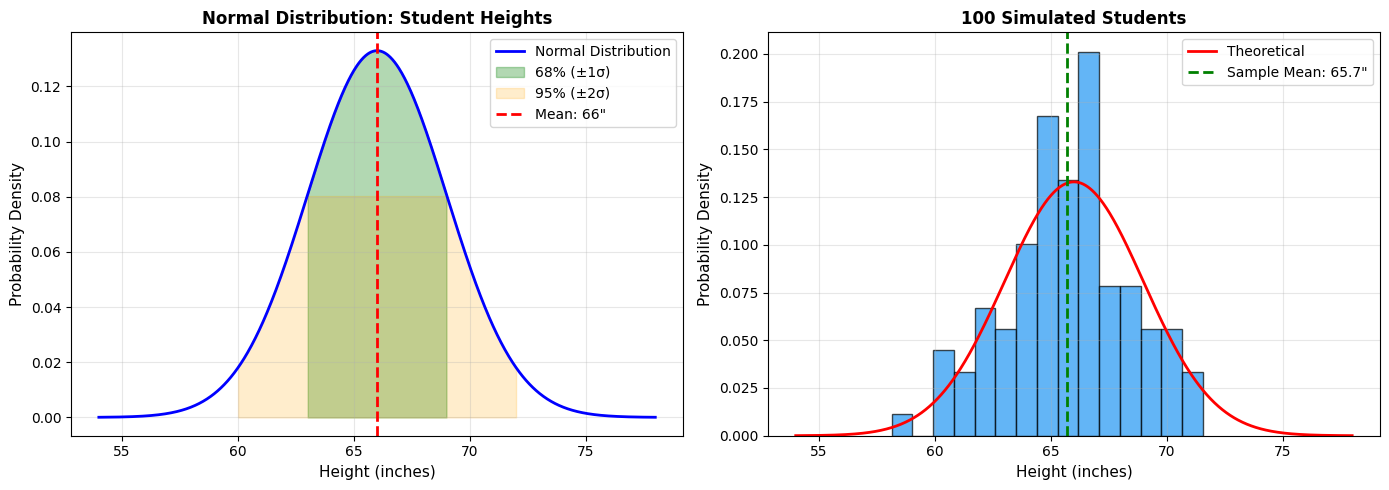


📏 Student Heights Analysis:

Mean: 66 inches (5'6")
Standard Deviation: 3 inches

68-95-99.7 Rule:
   → 68% between 63" and 69" (5'3" to 5'9")
   → 95% between 60" and 72" (5'0" to 6'0")
   → 99.7% between 57" and 75" (4'9" to 6'3")

📊 In our sample of 100 students:
   → 72 students (72%) within 1 SD (expected: 68%)
   → 99 students (99%) within 2 SD (expected: 95%)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Student heights: mean = 66 inches (5'6"), SD = 3 inches
mean_height = 66
sd_height = 3

# Generate distribution
x = np.linspace(mean_height - 4*sd_height, mean_height + 4*sd_height, 1000)
pdf = stats.norm.pdf(x, mean_height, sd_height)

# Simulate 100 students
np.random.seed(42)
student_heights = np.random.normal(mean_height, sd_height, 100)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bell curve with 68-95-99.7 rule
ax1.plot(x, pdf, 'b-', linewidth=2, label='Normal Distribution')

# Fill 68% (±1 SD)
x_1sd = x[(x >= mean_height - sd_height) & (x <= mean_height + sd_height)]
pdf_1sd = stats.norm.pdf(x_1sd, mean_height, sd_height)
ax1.fill_between(x_1sd, pdf_1sd, alpha=0.3, color='green', label='68% (±1σ)')

# Fill 95% (±2 SD)
x_2sd = x[((x >= mean_height - 2*sd_height) & (x < mean_height - sd_height)) | 
          ((x > mean_height + sd_height) & (x <= mean_height + 2*sd_height))]
pdf_2sd = stats.norm.pdf(x_2sd, mean_height, sd_height)
ax1.fill_between(x_2sd, pdf_2sd, alpha=0.2, color='orange', label='95% (±2σ)')

ax1.axvline(mean_height, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_height}"')
ax1.set_xlabel('Height (inches)', fontsize=11)
ax1.set_ylabel('Probability Density', fontsize=11)
ax1.set_title('Normal Distribution: Student Heights', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Histogram of simulated students
ax2.hist(student_heights, bins=15, density=True, alpha=0.7, color='#2196F3', edgecolor='black')
ax2.plot(x, pdf, 'r-', linewidth=2, label='Theoretical')
ax2.axvline(np.mean(student_heights), color='green', linestyle='--', linewidth=2,
           label=f'Sample Mean: {np.mean(student_heights):.1f}"')
ax2.set_xlabel('Height (inches)', fontsize=11)
ax2.set_ylabel('Probability Density', fontsize=11)
ax2.set_title('100 Simulated Students', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📏 Student Heights Analysis:")
print(f"\nMean: {mean_height} inches (5'6\")")
print(f"Standard Deviation: {sd_height} inches")

print(f"\n68-95-99.7 Rule:")
print(f"   → 68% between {mean_height - sd_height}\" and {mean_height + sd_height}\" (5'3\" to 5'9\")")
print(f"   → 95% between {mean_height - 2*sd_height}\" and {mean_height + 2*sd_height}\" (5'0\" to 6'0\")")
print(f"   → 99.7% between {mean_height - 3*sd_height}\" and {mean_height + 3*sd_height}\" (4'9\" to 6'3\")")

# Count students in ranges
within_1sd = np.sum((student_heights >= mean_height - sd_height) & 
                    (student_heights <= mean_height + sd_height))
within_2sd = np.sum((student_heights >= mean_height - 2*sd_height) & 
                    (student_heights <= mean_height + 2*sd_height))

print(f"\n📊 In our sample of 100 students:")
print(f"   → {within_1sd} students ({within_1sd}%) within 1 SD (expected: 68%)")
print(f"   → {within_2sd} students ({within_2sd}%) within 2 SD (expected: 95%)")

## Real-World Example: Delivery Times

Company promises deliveries average 2-3 days. Let's model and make predictions.

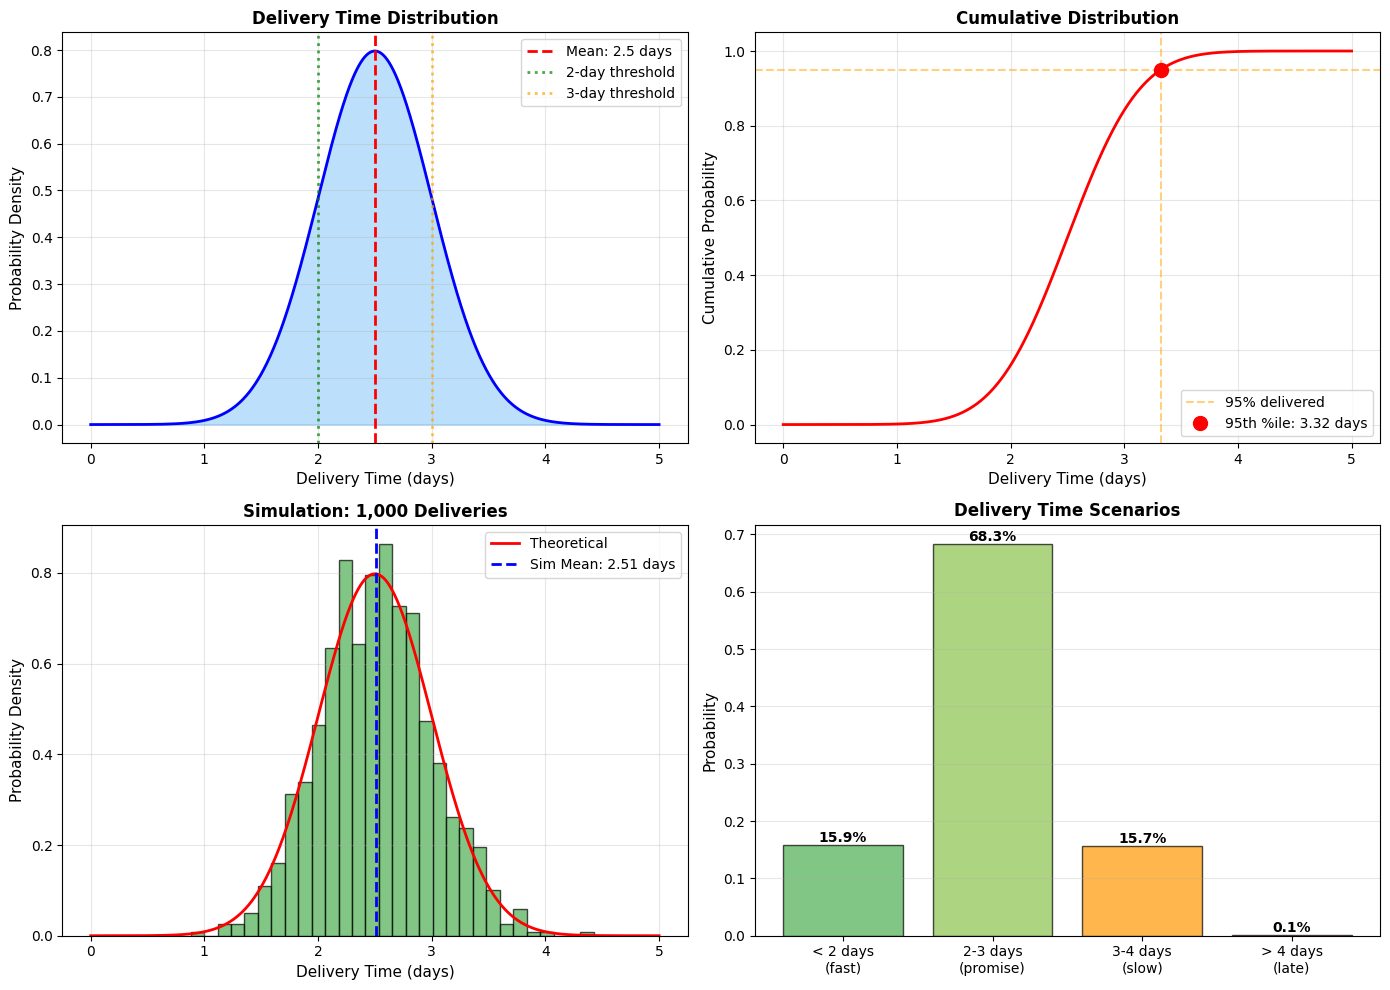


📦 Delivery Time Analysis:

Parameters: Mean = 2.5 days, SD = 0.5 days

💡 Business insights:
   → 68.3% arrive in 2-3 days (promised window)
   → 84.1% arrive within 3 days
   → 0.1% take more than 4 days (customer complaints)

🎯 Service level planning:
   → To meet 95% on-time: Promise 3.32 days
   → To meet 99% on-time: Promise 3.66 days

📊 In simulation of 1,000 deliveries:
   → 69.8% arrived in 2-3 days
   → 0.2% took more than 4 days


In [2]:
# Delivery parameters
mean_delivery = 2.5  # 2.5 days average
sd_delivery = 0.5    # 0.5 day standard deviation

# Generate distribution
x_delivery = np.linspace(0, 5, 1000)
pdf_delivery = stats.norm.pdf(x_delivery, mean_delivery, sd_delivery)

# Simulate 1000 deliveries
np.random.seed(42)
deliveries = np.random.normal(mean_delivery, sd_delivery, 1000)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution with key thresholds
ax1 = axes[0, 0]
ax1.plot(x_delivery, pdf_delivery, 'b-', linewidth=2)
ax1.fill_between(x_delivery, pdf_delivery, alpha=0.3, color='#2196F3')
ax1.axvline(mean_delivery, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_delivery} days')
ax1.axvline(2, color='green', linestyle=':', linewidth=2, alpha=0.7, label='2-day threshold')
ax1.axvline(3, color='orange', linestyle=':', linewidth=2, alpha=0.7, label='3-day threshold')
ax1.set_xlabel('Delivery Time (days)', fontsize=11)
ax1.set_ylabel('Probability Density', fontsize=11)
ax1.set_title('Delivery Time Distribution', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Cumulative distribution
ax2 = axes[0, 1]
cdf_delivery = stats.norm.cdf(x_delivery, mean_delivery, sd_delivery)
ax2.plot(x_delivery, cdf_delivery, 'r-', linewidth=2)
ax2.axhline(0.95, color='orange', linestyle='--', alpha=0.5, label='95% delivered')
# Find 95th percentile
percentile_95 = stats.norm.ppf(0.95, mean_delivery, sd_delivery)
ax2.axvline(percentile_95, color='orange', linestyle='--', alpha=0.5)
ax2.plot(percentile_95, 0.95, 'ro', markersize=10, label=f'95th %ile: {percentile_95:.2f} days')
ax2.set_xlabel('Delivery Time (days)', fontsize=11)
ax2.set_ylabel('Cumulative Probability', fontsize=11)
ax2.set_title('Cumulative Distribution', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Simulation histogram
ax3 = axes[1, 0]
ax3.hist(deliveries, bins=30, density=True, alpha=0.7, color='#4CAF50', edgecolor='black')
ax3.plot(x_delivery, pdf_delivery, 'r-', linewidth=2, label='Theoretical')
ax3.axvline(np.mean(deliveries), color='blue', linestyle='--', linewidth=2,
           label=f'Sim Mean: {np.mean(deliveries):.2f} days')
ax3.set_xlabel('Delivery Time (days)', fontsize=11)
ax3.set_ylabel('Probability Density', fontsize=11)
ax3.set_title('Simulation: 1,000 Deliveries', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Business scenarios
ax4 = axes[1, 1]
scenarios = ['< 2 days\n(fast)', '2-3 days\n(promise)', '3-4 days\n(slow)', '> 4 days\n(late)']
probs = [
    stats.norm.cdf(2, mean_delivery, sd_delivery),
    stats.norm.cdf(3, mean_delivery, sd_delivery) - stats.norm.cdf(2, mean_delivery, sd_delivery),
    stats.norm.cdf(4, mean_delivery, sd_delivery) - stats.norm.cdf(3, mean_delivery, sd_delivery),
    1 - stats.norm.cdf(4, mean_delivery, sd_delivery)
]
colors_scenarios = ['#4CAF50', '#8BC34A', '#FF9800', '#F44336']
bars = ax4.bar(range(len(scenarios)), probs, color=colors_scenarios, alpha=0.7, edgecolor='black')
ax4.set_xticks(range(len(scenarios)))
ax4.set_xticklabels(scenarios)
ax4.set_ylabel('Probability', fontsize=11)
ax4.set_title('Delivery Time Scenarios', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, probs):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📦 Delivery Time Analysis:")
print(f"\nParameters: Mean = {mean_delivery} days, SD = {sd_delivery} days")

print(f"\n💡 Business insights:")
prob_within_2_3 = stats.norm.cdf(3, mean_delivery, sd_delivery) - stats.norm.cdf(2, mean_delivery, sd_delivery)
prob_under_3 = stats.norm.cdf(3, mean_delivery, sd_delivery)
prob_over_4 = 1 - stats.norm.cdf(4, mean_delivery, sd_delivery)

print(f"   → {prob_within_2_3:.1%} arrive in 2-3 days (promised window)")
print(f"   → {prob_under_3:.1%} arrive within 3 days")
print(f"   → {prob_over_4:.1%} take more than 4 days (customer complaints)")

print(f"\n🎯 Service level planning:")
print(f"   → To meet 95% on-time: Promise {percentile_95:.2f} days")
print(f"   → To meet 99% on-time: Promise {stats.norm.ppf(0.99, mean_delivery, sd_delivery):.2f} days")

# Actual simulation results
actual_2_3 = np.sum((deliveries >= 2) & (deliveries <= 3)) / len(deliveries)
actual_over_4 = np.sum(deliveries > 4) / len(deliveries)
print(f"\n📊 In simulation of 1,000 deliveries:")
print(f"   → {actual_2_3:.1%} arrived in 2-3 days")
print(f"   → {actual_over_4:.1%} took more than 4 days")

## Summary: The Normal Distribution

### Key Properties
- **Symmetric:** Mirror image on both sides of mean
- **Bell-shaped:** Most values in middle, fewer at extremes
- **Two parameters:** Mean (μ) controls center, SD (σ) controls spread
- **Total area = 1:** Represents all possible outcomes

### The 68-95-99.7 Rule (Empirical Rule)
- 68% of data within μ ± 1σ
- 95% of data within μ ± 2σ
- 99.7% of data within μ ± 3σ

### Why It's Everywhere
- **Central Limit Theorem:** Averages of samples tend toward normal
- **Natural phenomena:** Heights, weights, measurement errors
- **Additive effects:** Many small random factors sum to normal

### Real-World Uses
- **Quality control:** Detect defects outside normal range
- **Service levels:** Set delivery promises (e.g., 95th percentile)
- **Risk management:** Understand probability of extreme events
- **A/B testing:** Calculate statistical significance
- **Forecasting:** Model uncertainty in predictions

**Remember:** The normal distribution is the foundation of most statistical inference!